### Import claims_data.csv and cust_data.csv which is provided to you andcombine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats

In [2]:
claims=pd.read_csv("claims.csv")
cust=pd.read_csv("cust_demographics.csv")

In [3]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
cust_claims=pd.merge(cust,claims,left_on='CUST_ID',right_on='customer_id',how="inner")

In [6]:
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [7]:
cust_claims.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
cust_claims.DateOfBirth =pd.to_datetime(cust_claims.DateOfBirth)
cust_claims.claim_date=pd.to_datetime(cust_claims.claim_date)  


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [9]:
cust_claims['claim_amount']=cust_claims['claim_amount'].astype(str).str.replace('$','')
cust_claims['claim_amount']=pd.to_numeric(cust_claims['claim_amount'],errors='coerce')
cust_claims['claim_amount'].head()

0    2980.0
1    2980.0
2    3369.5
3    1950.0
4    1680.0
Name: claim_amount, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
cust_claims['Flag'] = np.where(cust_claims.police_report == 'Unknown',0,1)
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1


### 5.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [11]:
cust_claims.sort_values(by='claim_date',inplace=True)
cust_claims.drop_duplicates(subset='CUST_ID',keep='last')

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,1
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,1
312,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,1
383,25634799,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,1
334,22756942,Male,1982-10-09,FL,462-823-3126,Silver,70512964,22756942,Driver error,2017-01-01,Auto,Yes,Injury only,20310.0,1.0,No,1
231,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,1
195,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1064,75934330,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,75934330,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1.0,No,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [12]:
def missing_imputation(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean())
    else:
        x = x.fillna(x.mode())
    return x

In [13]:
cust_claims=cust_claims.apply(lambda x:missing_imputation(x))

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [14]:
def year_fix(x):
    year = x.year - 100 if x.year > 2020 else x.year
    return datetime.date(year, x.month, x.day)

cust_claims['DateOfBirth']= cust_claims['DateOfBirth'].apply(year_fix)

In [15]:
cust_claims['age']=pd.datetime.today().year-cust_claims['DateOfBirth'].apply(lambda x:x.year)

In [16]:
cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.age >=18) & (cust_claims.age <30),'AgeGroup'] = 'Youth'
cust_claims.loc[(cust_claims.age >=30) & (cust_claims.age <60),'AgeGroup'] = 'Adult'
cust_claims.loc[(cust_claims.age >=60),'AgeGroup'] = 'Senior'

In [17]:
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,1,35,Adult
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,1,26,Youth
312,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.000000,3.0,No,1,45,Adult
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,1,27,Youth
120,39587790,Male,1965-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,1,55,Adult
383,25634799,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.000000,2.0,No,1,46,Adult
334,22756942,Male,1982-10-09,FL,462-823-3126,Silver,70512964,22756942,Driver error,2017-01-01,Auto,Yes,Injury only,20310.000000,1.0,No,1,38,Adult
231,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,1,21,Youth
195,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,0,46,Adult
1064,75934330,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,75934330,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.000000,1.0,No,1,33,Adult


### 8. What is the average amount claimed by the customers from various segments?


In [18]:
cust_claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12829.631974
Platinum    12341.952267
Silver      12208.435570
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

cust_claims.columns

In [19]:
ds=pd.to_datetime('2018-10-01 ')
ds

Timestamp('2018-10-01 00:00:00')

In [20]:
a=(ds- cust_claims.claim_date)
cust_claims[a.apply(lambda x:x.days)>=20].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64

### 10.How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [21]:
cust_claims.loc[((cust_claims.State == 'TX') | (cust_claims.State == 'DE') | (cust_claims.State == 'AK')) & ((cust_claims.incident_cause == 'Driver error')|(cust_claims.incident_cause == 'Other driver error')) & (cust_claims.AgeGroup == 'Adult'),'CUST_ID'].count()

30

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [22]:
claim = pd.pivot_table(cust_claims, index =['Segment'],columns ='gender',values ='claim_amount')
claim


gender,Female,Male
Segment,,
Gold,12337.649897,13242.028715
Platinum,12277.117977,12415.993793
Silver,11526.738532,12823.080440


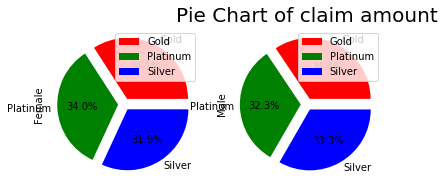

In [52]:
import matplotlib.pyplot as plt
claim.plot(kind='pie', 
            labels=['Gold','Platinum','Silver'],
            colors=['r', 'g', 'b'],
            explode=(0.1, 0.1, 0.1),
            autopct='%1.1f%%', 
            fontsize=10,subplots='true' )

plt.title('Pie Chart of claim amount',fontsize=20)
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

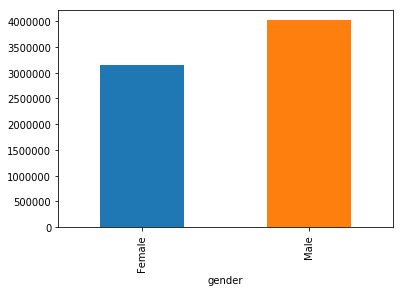

In [24]:
df=cust_claims[(cust_claims.incident_cause == 'Driver error')|(cust_claims.incident_cause == 'Other driver error')]
df.groupby('gender')['claim_amount'].sum().plot(kind='bar')


In [25]:
# Males had claimed the most for any type of driver related issues

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

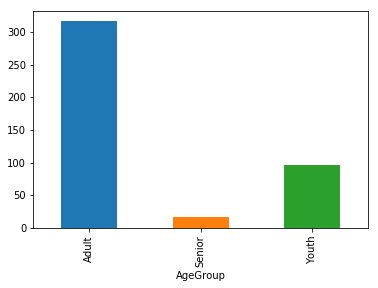

In [26]:
fraud_claim_grp=cust_claims.loc[cust_claims['fraudulent'] == 'Yes'].groupby(['AgeGroup'])['total_policy_claims'].sum()
fraud_claim_grp.plot(kind='bar')

In [27]:
# Adult age group had the maximum fraudulent policy claims

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

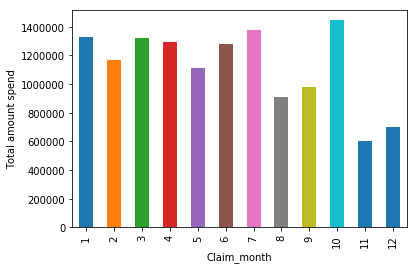

In [28]:
cust_claims['Claim_month'] = cust_claims['claim_date'].apply(lambda x:x.month)
df=cust_claims.groupby('Claim_month')['claim_amount'].sum()
df.plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

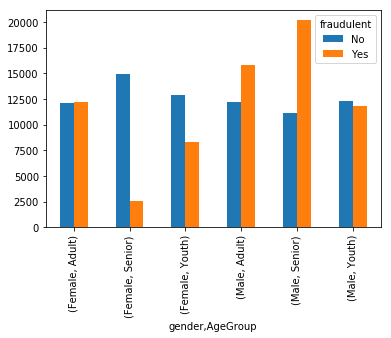

In [29]:
cust_claims.groupby(['gender','AgeGroup','fraudulent'])['claim_amount'].mean().unstack().plot(kind='bar')

### 16. Is there any similarity in the amount claimed by males and females?

In [30]:
# H0: No difference in the amount claimed by males and females
# H1: There is a difference in the amount claimed by males and females

In [31]:
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=="Male"]
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=="Female"]

In [32]:
print(claim_male.mean())
print(claim_female.mean())

12853.058506136274
12062.634706623676


In [33]:
stats.ttest_ind(a= claim_male,b= claim_female,equal_var=True)

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

In [34]:
## P value is greater than 0.05 so we fail to reject the null hypothesis with 95% confidence.There is a no significant difference in the amount claimed by males and females.

### 17. Is there any relationship between age category and segment?

In [35]:
# H0: No relation between category and segment
# H1: There is a relationship between age category and segment

In [36]:
tab = pd.crosstab(cust_claims.AgeGroup, cust_claims.Segment, margins = True)
tab

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,288,259,254,801
Senior,6,15,9,30
Youth,81,88,85,254
All,375,362,348,1085


In [37]:
stats.chi2_contingency(observed=tab)

(5.9095156803232545,
 0.748939106366375,
 9,
 array([[ 276.84331797,  267.24608295,  256.91059908,  801.        ],
        [  10.36866359,   10.00921659,    9.62211982,   30.        ],
        [  87.78801843,   84.74470046,   81.46728111,  254.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [38]:
# P value is greater than 0.05 so we fail to reject the null hypothesis with 95% confidence.There is no relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000

In [39]:
# H0:The current year shows no significant rise in claim amounts as compared to 2016-17
# H1:The current year shows a significant rise in claim amounts as compared to 2016-17

In [40]:
cust_claims['Claim_Year']=pd.DatetimeIndex(cust_claims['claim_date']).year 
dt=cust_claims[cust_claims.Claim_Year==2018]

In [41]:
#One sample t test
stats.ttest_1samp(a=dt.claim_amount,popmean=10000)

Ttest_1sampResult(statistic=4.421788475402985, pvalue=1.2086880225728461e-05)

In [42]:
cust_claims[cust_claims.Claim_Year==2018].claim_amount.mean()

12701.148186173856

In [43]:
# P value is less than 0.05 so we reject the null hypothesis with 95% confidence.Therefore The current year shows a significant rise in claim amounts as compared to 2016-17(from 10000 it went up to 12701)

### 19. Is there any difference between age groups and insurance claims?

In [44]:
# H0:There is no difference between age groups and insurance claims
# H1:There is a difference between age groups and insurance claims

In [45]:
age_group_1 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Adult"]
age_group_2 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Senior"]
age_group_3 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Youth"]


In [46]:
stats.f_oneway(age_group_1,age_group_2,age_group_3)

F_onewayResult(statistic=1.3009423186671498, pvalue=0.27270064218616064)

In [47]:
## P value is greater than 0.05 so we fail to reject the null hypothesis with 95% confidence.There is a no significant difference between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?¶

In [48]:
cust_claims.total_policy_claims.corr(other=cust_claims.claim_amount)

-0.017448562393468953

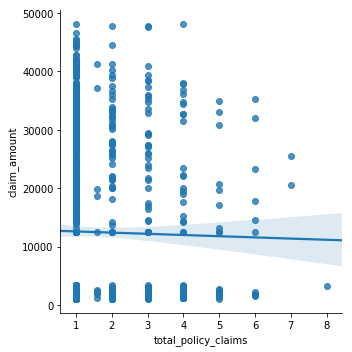

In [51]:
import seaborn as sns
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = cust_claims)

In [50]:
#Hence total number of policy claims is inversely proportional to the claimed amount